In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Loan_Modelling.csv")

In [4]:
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


- There are no missing values in the dataset, however we need to explore further to be sure

In [6]:
df["Age"].describe()

count    5000.000000
mean       45.338400
std        11.463166
min        23.000000
25%        35.000000
50%        45.000000
75%        55.000000
max        67.000000
Name: Age, dtype: float64

- The Age column has a min value of 23 years, and a mean of 45.33, and a median of 45.00

In [7]:
df["Age"].isnull().sum()

0

In [8]:
df.sample(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
1146,1147,31,7,71,90034,1,0.10,1,78,0,1,0,0,0
3792,3793,62,36,109,92709,4,1.70,3,0,0,0,0,1,0
2441,2442,64,38,38,94305,2,0.30,1,186,0,0,0,1,1
2421,2422,43,19,40,94949,3,0.60,2,0,0,0,0,1,0
970,971,57,32,75,94928,2,3.70,1,236,0,0,0,1,0
4051,4052,55,29,162,93105,1,2.90,1,0,0,0,0,1,1
4606,4607,44,20,199,94607,2,6.67,1,0,0,0,0,1,0
902,903,57,33,95,95054,2,1.60,1,0,0,0,0,0,0
2014,2015,49,19,169,95054,3,5.67,3,167,1,0,1,0,1
3389,3390,27,3,88,92182,3,0.80,1,238,0,0,0,0,0


In [9]:
df["Age"].unique()

array([25, 45, 39, 35, 37, 53, 50, 34, 65, 29, 48, 59, 67, 60, 38, 42, 46,
       55, 56, 57, 44, 36, 43, 40, 30, 31, 51, 32, 61, 41, 28, 49, 47, 62,
       58, 54, 33, 27, 66, 24, 52, 26, 64, 63, 23], dtype=int64)

In [10]:
df["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43], dtype=int64)

- Observe that, there are people with -1,-2,-3 experience, which is impossible. This need to be treated

In [11]:
df[(df["Experience"] == -1)] #& (df["Experience"] == -2)  & (df["Experience"] == -3)]

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
649,650,25,-1,82,92677,4,2.10,3,0,0,0,0,1,0
670,671,23,-1,61,92374,4,2.60,1,239,0,0,0,1,0
686,687,24,-1,38,92612,4,0.60,2,0,0,0,0,1,0


In [12]:
df[(df["Experience"] == -2)]

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1
793,794,24,-2,150,94720,2,2.00,1,0,0,0,0,1,0
889,890,24,-2,82,91103,2,1.60,3,0,0,0,0,1,1
2466,2467,24,-2,80,94105,2,1.60,3,0,0,0,0,1,0
2717,2718,23,-2,45,95422,4,0.60,2,0,0,0,0,1,1
2876,2877,24,-2,80,91107,2,1.60,3,238,0,0,0,0,0
2962,2963,23,-2,81,91711,2,1.80,2,0,0,0,0,0,0
3130,3131,23,-2,82,92152,2,1.80,2,0,0,1,0,0,1


In [13]:
df[(df["Experience"] == -3)]

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
2618,2619,23,-3,55,92704,3,2.4,2,145,0,0,0,1,0
3626,3627,24,-3,28,90089,4,1.0,3,0,0,0,0,0,0
4285,4286,23,-3,149,93555,2,7.2,1,0,0,0,0,1,0
4514,4515,24,-3,41,91768,4,1.0,3,0,0,0,0,1,0


- It is possible that those people with -1, -2 & -3 experience made an error while typing, hence we replace them with the original number, e.g 1,2,3 respectively

In [14]:
df.loc[(df["Experience"] == -1), "Experience"] = 1

In [15]:
#Sanity Check
df[(df["Experience"] == -1)]

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard


In [16]:
df.loc[(df["Experience"] == -2), "Experience"] = 2

In [17]:
#Sanity Check
df[(df["Experience"] == -2)]

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard


In [18]:
df.loc[(df["Experience"] == -3), "Experience"] = 3

In [19]:
#Sanity Check
df[(df["Experience"] == -3)]

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard


In [20]:
#Sanity Check
df["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, 34,  0, 38, 40, 33,  4, 42, 43], dtype=int64)

- The -3, -2, -1 has been successfully replaced

In [21]:
df["Income"].unique()

array([ 49,  34,  11, 100,  45,  29,  72,  22,  81, 180, 105, 114,  40,
       112, 130, 193,  21,  25,  63,  62,  43, 152,  83, 158,  48, 119,
        35,  41,  18,  50, 121,  71, 141,  80,  84,  60, 132, 104,  52,
       194,   8, 131, 190,  44, 139,  93, 188,  39, 125,  32,  20, 115,
        69,  85, 135,  12, 133,  19,  82, 109,  42,  78,  51, 113, 118,
        64, 161,  94,  15,  74,  30,  38,   9,  92,  61,  73,  70, 149,
        98, 128,  31,  58,  54, 124, 163,  24,  79, 134,  23,  13, 138,
       171, 168,  65,  10, 148, 159, 169, 144, 165,  59,  68,  91, 172,
        55, 155,  53,  89,  28,  75, 170, 120,  99, 111,  33, 129, 122,
       150, 195, 110, 101, 191, 140, 153, 173, 174,  90, 179, 145, 200,
       183, 182,  88, 160, 205, 164,  14, 175, 103, 108, 185, 204, 154,
       102, 192, 202, 162, 142,  95, 184, 181, 143, 123, 178, 198, 201,
       203, 189, 151, 199, 224, 218], dtype=int64)

In [22]:
df["Personal_Loan"].unique()

array([0, 1], dtype=int64)

In [23]:
df["Mortgage"].unique()

array([  0, 155, 104, 134, 111, 260, 163, 159,  97, 122, 193, 198, 285,
       412, 153, 211, 207, 240, 455, 112, 336, 132, 118, 174, 126, 236,
       166, 136, 309, 103, 366, 101, 251, 276, 161, 149, 188, 116, 135,
       244, 164,  81, 315, 140,  95,  89,  90, 105, 100, 282, 209, 249,
        91,  98, 145, 150, 169, 280,  99,  78, 264, 113, 117, 325, 121,
       138,  77, 158, 109, 131, 391,  88, 129, 196, 617, 123, 167, 190,
       248,  82, 402, 360, 392, 185, 419, 270, 148, 466, 175, 147, 220,
       133, 182, 290, 125, 124, 224, 141, 119, 139, 115, 458, 172, 156,
       547, 470, 304, 221, 108, 179, 271, 378, 176,  76, 314,  87, 203,
       180, 230, 137, 152, 485, 300, 272, 144,  94, 208, 275,  83, 218,
       327, 322, 205, 227, 239,  85, 160, 364, 449,  75, 107,  92, 187,
       355, 106, 587, 214, 307, 263, 310, 127, 252, 170, 265, 177, 305,
       372,  79, 301, 232, 289, 212, 250,  84, 130, 303, 256, 259, 204,
       524, 157, 231, 287, 247, 333, 229, 357, 361, 294,  86, 32

In [24]:
df["Family"].unique()

array([4, 3, 1, 2], dtype=int64)

In [25]:
df["ZIPCode"].unique()

array([91107, 90089, 94720, 94112, 91330, 92121, 91711, 93943, 93023,
       94710, 90277, 93106, 94920, 91741, 95054, 95010, 94305, 91604,
       94015, 90095, 91320, 95521, 95064, 90064, 94539, 94104, 94117,
       94801, 94035, 92647, 95814, 94114, 94115, 92672, 94122, 90019,
       95616, 94065, 95014, 91380, 95747, 92373, 92093, 94005, 90245,
       95819, 94022, 90404, 93407, 94523, 90024, 91360, 95670, 95123,
       90045, 91335, 93907, 92007, 94606, 94611, 94901, 92220, 93305,
       95134, 94612, 92507, 91730, 94501, 94303, 94105, 94550, 92612,
       95617, 92374, 94080, 94608, 93555, 93311, 94704, 92717, 92037,
       95136, 94542, 94143, 91775, 92703, 92354, 92024, 92831, 92833,
       94304, 90057, 92130, 91301, 92096, 92646, 92182, 92131, 93720,
       90840, 95035, 93010, 94928, 95831, 91770, 90007, 94102, 91423,
       93955, 94107, 92834, 93117, 94551, 94596, 94025, 94545, 95053,
       90036, 91125, 95120, 94706, 95827, 90503, 90250, 95817, 95503,
       93111, 94132,

In [26]:
df["CCAvg"].unique()

array([ 1.6 ,  1.5 ,  1.  ,  2.7 ,  0.4 ,  0.3 ,  0.6 ,  8.9 ,  2.4 ,
        0.1 ,  3.8 ,  2.5 ,  2.  ,  4.7 ,  8.1 ,  0.5 ,  0.9 ,  1.2 ,
        0.7 ,  3.9 ,  0.2 ,  2.2 ,  3.3 ,  1.8 ,  2.9 ,  1.4 ,  5.  ,
        2.3 ,  1.1 ,  5.7 ,  4.5 ,  2.1 ,  8.  ,  1.7 ,  0.  ,  2.8 ,
        3.5 ,  4.  ,  2.6 ,  1.3 ,  5.6 ,  5.2 ,  3.  ,  4.6 ,  3.6 ,
        7.2 ,  1.75,  7.4 ,  2.67,  7.5 ,  6.5 ,  7.8 ,  7.9 ,  4.1 ,
        1.9 ,  4.3 ,  6.8 ,  5.1 ,  3.1 ,  0.8 ,  3.7 ,  6.2 ,  0.75,
        2.33,  4.9 ,  0.67,  3.2 ,  5.5 ,  6.9 ,  4.33,  7.3 ,  4.2 ,
        4.4 ,  6.1 ,  6.33,  6.6 ,  5.3 ,  3.4 ,  7.  ,  6.3 ,  8.3 ,
        6.  ,  1.67,  8.6 ,  7.6 ,  6.4 , 10.  ,  5.9 ,  5.4 ,  8.8 ,
        1.33,  9.  ,  6.7 ,  4.25,  6.67,  5.8 ,  4.8 ,  3.25,  5.67,
        8.5 ,  4.75,  4.67,  3.67,  8.2 ,  3.33,  5.33,  9.3 ,  2.75])

In [27]:
df["CCAvg"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5000 entries, 0 to 4999
Series name: CCAvg
Non-Null Count  Dtype  
--------------  -----  
5000 non-null   float64
dtypes: float64(1)
memory usage: 39.2 KB


In [28]:
df["Education"].unique()

array([1, 2, 3], dtype=int64)

In [29]:
df.shape

(5000, 14)

- There are 5000 rows and 14 columns in the dataset

In [30]:
#Check duplicate
df.duplicated().sum()

0

- There are no duplicate in the dataset

### Data Visualization

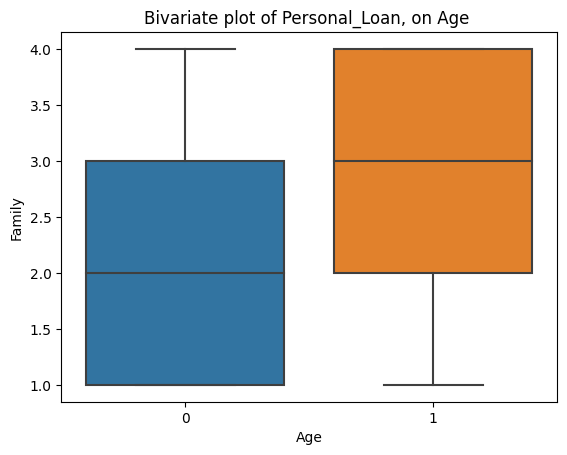

In [57]:
sns.boxplot( x ='Personal_Loan',y = "Family", data =df )
plt.title('Bivariate plot of Personal_Loan, on Age ') # title the plot
plt.xlabel("Age") # name x-axis
#plt.savefig('Plot_ vs_Age.png')#saving the plot
plt.show()

In [ ]:
sns.boxplot( x ='Personal_Loan',y = "Age", data =df )
plt.title('Bivariate plot of Personal_Loan, on Age ') # title the plot
plt.xlabel("Age") # name x-axis
#plt.savefig('Plot_ vs_Age.png')#saving the plot
plt.show()

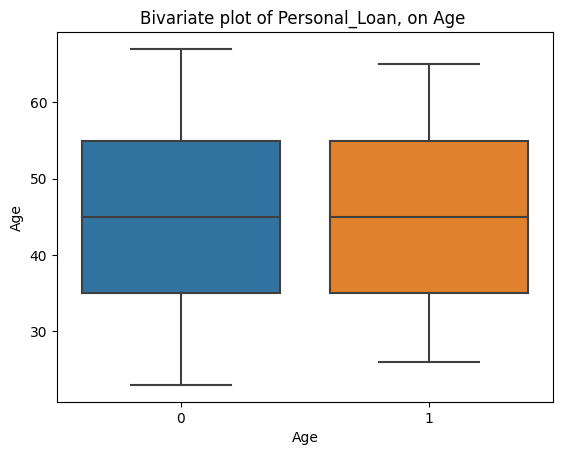

In [56]:
sns.boxplot( x ='Personal_Loan',y = "Age", data =df )
plt.title('Bivariate plot of Personal_Loan, on Age ') # title the plot
plt.xlabel("Age") # name x-axis
#plt.savefig('Plot_ vs_Age.png')#saving the plot
plt.show()

In [ ]:
- The plot above shows that 

In [31]:
from utils import labeled_barplots

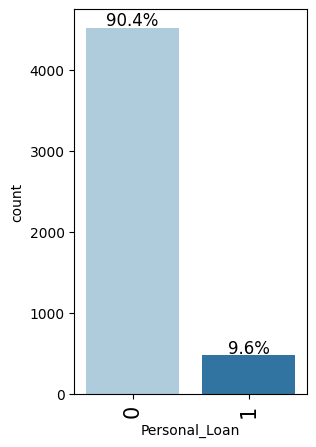

In [32]:
labeled_barplots(data = df, feature ="Personal_Loan", perc = True)

- There are 90.4 and 9.6, this is an example of imbalanced dataset

In [33]:
df["Personal_Loan"].value_counts(normalize = True)

0    0.904
1    0.096
Name: Personal_Loan, dtype: float64

In [35]:
####Identifying Correlation in Data

In [34]:
#Check for correlation
df.corr()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008202,-0.017695,0.002240,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.993991,-0.055269,-0.030530,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008202,0.993991,1.000000,-0.046876,-0.030837,-0.051851,-0.049738,0.013919,-0.011097,-0.008304,-0.000989,0.009735,0.014051,0.008851
Income,-0.017695,-0.055269,-0.046876,1.000000,-0.030709,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIPCode,0.002240,-0.030530,-0.030837,-0.030709,1.000000,0.027512,-0.012188,-0.008266,0.003614,-0.002974,0.002422,0.021671,0.028317,0.024033
Family,-0.016797,-0.046418,-0.051851,-0.157501,0.027512,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.049738,0.645984,-0.012188,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013919,-0.187524,-0.008266,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.011097,0.206806,0.003614,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal_Loan,-0.024801,-0.007726,-0.008304,0.502462,-0.002974,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


<Axes: >

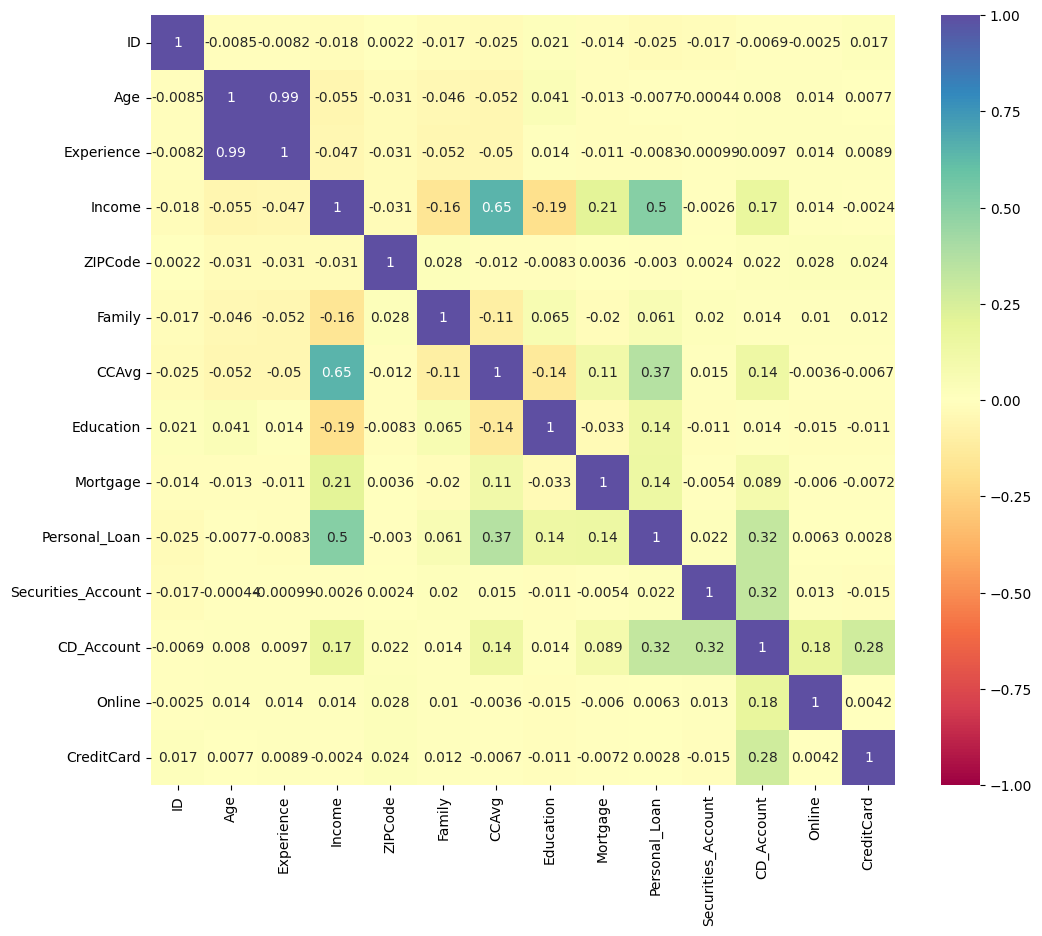

In [37]:
mat_cor = df.corr()
plt.figure(figsize = (12, 10))
sns.heatmap(mat_cor, annot= True, vmin =-1, vmax = 1, cmap ="Spectral")

- From the heatmap above, there is little to no  correlation between personal loan and the other features

### Feature Selection

In [38]:
from sklearn.model_selection import train_test_split
#Select Features
X = df.drop("Personal_Loan", axis = 1)
y =df["Personal_Loan"]

## Spliting the data 
We will use 80% of data for training and 20% for testing.

In [39]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    stratify = y)

# Logistic Regression

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
scaler = MinMaxScaler()
x_train_sd = scaler.fit_transform(x_train)
x_test_sd = scaler.transform(x_test)

In [42]:
#build the model
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state = 0)#, class_weight ={1:0.9, 0:0.1})

log_reg.fit(x_train_sd, y_train)

LogisticRegression(random_state=0)

In [43]:
log_reg.score(x_train_sd, y_train)

0.9505

In [45]:
log_reg.predict(x_test)

C:\Users\cetphoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [46]:
log_reg.predict_proba(x_test_sd)

array([[4.56231183e-01, 5.43768817e-01],
       [9.99827741e-01, 1.72258968e-04],
       [9.00705646e-01, 9.92943542e-02],
       ...,
       [9.84390723e-01, 1.56092766e-02],
       [8.68409296e-01, 1.31590704e-01],
       [9.66983668e-01, 3.30163317e-02]])

### Model Performance Check

In [44]:
from sklearn.metrics import (accuracy_score, recall_score, precision_score, f1_score, confusion_matrix)

In [47]:
from utils import model_performance_classification

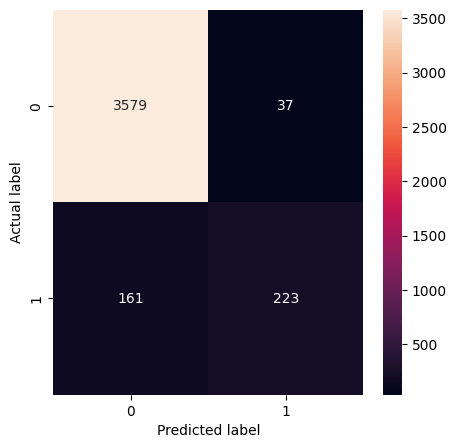

,Accuracy,Recall,Precision,F1-score
0,0.9505,0.580729,0.857692,0.692547


In [48]:
log_reg_train = model_performance_classification(log_reg, x_train_sd, y_train)
log_reg_train

- The performance here is low, let's check the testing

- 3579 do not accept personal loan
- 37 were wrongly predicted that they will collect personal loan, whereas they wont.
- 161 were wrongly predicted that they will not collect personal loan, yet they will
- 223 will accept personal loan


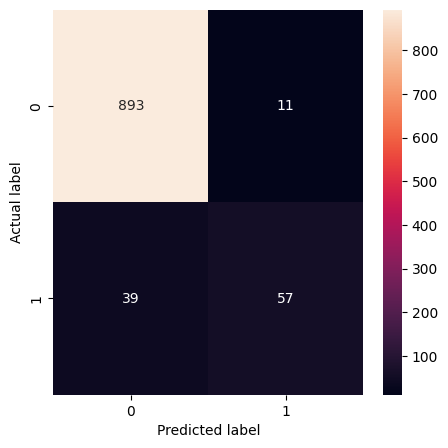

,Accuracy,Recall,Precision,F1-score
0,0.95,0.59375,0.838235,0.695122


In [58]:
log_reg_test = model_performance_classification(log_reg, x_test_sd, y_test)
log_reg_test

- Even though the model performance is low, the performance tends to increase in testing, however, this model can be further improved.

### Model Improvement

- We try to change the metrics by tuning the threshold

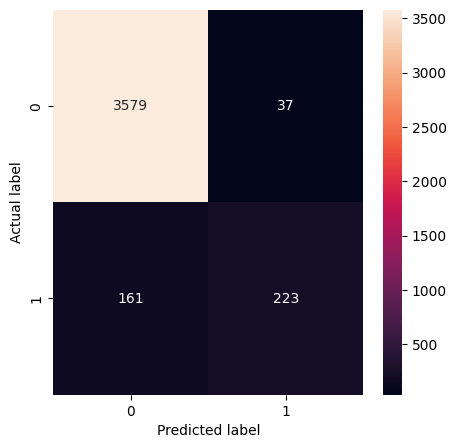

,Accuracy,Recall,Precision,F1-score
0,0.9505,0.580729,0.857692,0.692547


In [60]:
log_reg2_train = model_performance_classification(log_reg, x_train_sd, y_train,
                                                 threshold = 0.5)
log_reg2_train

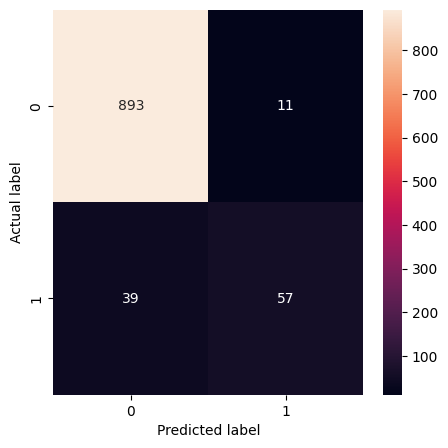

,Accuracy,Recall,Precision,F1-score
0,0.95,0.59375,0.838235,0.695122


In [61]:
log_reg2_test = model_performance_classification(log_reg, x_test_sd, y_test,
                                                 threshold = 0.5)
log_reg2_test

- By changing the treshold, there is no more improvement between when threshhold was applied and when it wasn't

- Let's try to balance the data using SMOTE and rebuild the model

In [62]:
from imblearn.over_sampling import SMOTE

In [64]:
smote =SMOTE(random_state=0) 
X_sm, y_sm = smote.fit_resample(X, y)

In [65]:
#Recheck the value_count for y
y_sm.value_counts(normalize = True)

0    0.5
1    0.5
Name: Personal_Loan, dtype: float64

- The model has been successfully balanced, now let's rebuild the model

### Rebuild the Model

In [66]:
x_train_sm, x_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size = 0.2) 

In [67]:
#Normalizing the data
x_train_sm_sd = scaler.fit_transform(x_train_sm)
x_test_sm_sd = scaler.transform(x_test_sm)

In [68]:
#Without including classweight
log_reg3 = LogisticRegression(random_state = 0)#, class_weight ={1:0.9, 0:0.1})

log_reg3.fit(x_train_sm_sd, y_train_sm)

LogisticRegression(random_state=0)

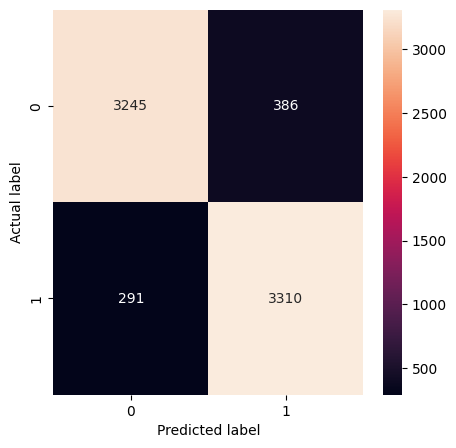

,Accuracy,Recall,Precision,F1-score
0,0.906388,0.919189,0.895563,0.907222


In [69]:
log_reg3_train = model_performance_classification(log_reg3, x_train_sm_sd, y_train_sm)
log_reg3_train

- By balancing our data, the model performs far better than when it was not balanced. Let' s check the performance on the test set

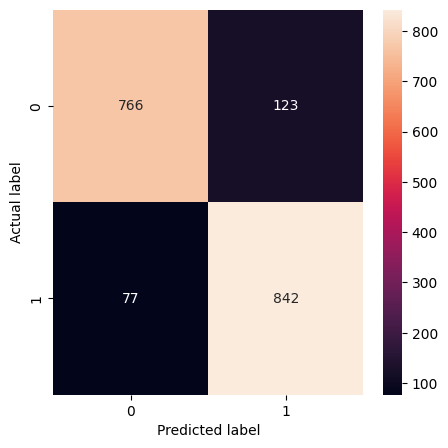

,Accuracy,Recall,Precision,F1-score
0,0.889381,0.916213,0.872539,0.893843


In [70]:
log_reg3_test = model_performance_classification(log_reg3, x_test_sm_sd, y_test_sm)
log_reg3_test

- Yes, we can say this model generalizes well in the performance metrics, however, there seems to be an increase in the error, the false negative and false positive error, hence we improve the model by trying the tree- based models

### Improving Model Performance with Decision Tree

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import (precision_score, accuracy_score, recall_score, f1_score)

In [73]:
dec_tree = DecisionTreeClassifier(random_state = 0)
dec_tree.fit (x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [81]:
#accuracy on training for Decision tree
pred_train_dec = dec_tree.predict(x_train)
acc_train_dec = accuracy_score(y_train, pred_train_dec)
acc_train_dec

1.0

- The accuracy for training on decision tree gave 1.0 which implies 100% accuracy, however, we need to 

In [75]:
#accuracy on test for Decision tree
pred_test_dec = dec_tree.predict(x_test)
acc_test_dec = accuracy_score(y_test, pred_test_dec)
acc_test_dec

0.972

- The accuracy generalizes well, however, we need to check the other performance metrics such as recall, e.t.c

In [82]:
rec_train_dec = recall_score(y_train, pred_train_dec)

rec_test_dec = recall_score(y_test, pred_test_dec)

In [83]:
print(rec_train_dec)

print ( rec_test_dec)

1.0
0.7916666666666666


- This model overfits, 100% in testing, 79% in training

### Now, still on decision Tree, let us adjust class weight

In [84]:
dec_tree2 = DecisionTreeClassifier(random_state = 0, class_weight= {0:0.1, 1:0.9})
dec_tree2.fit (x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, random_state=0)

In [85]:
from utils import model_performance_classification

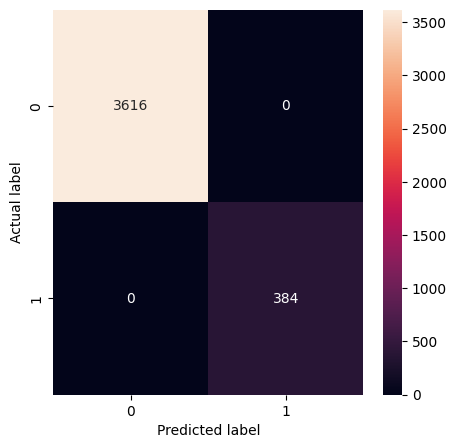

,Accuracy,Recall,Precision,F1-score
0,1.0,1.0,1.0,1.0


In [86]:
#Checking Model performance on the training
dec2_traindf = model_performance_classification(dec_tree2, x_train, y_train)
dec2_traindf

- By adjusting the class weight, the model is 100% in all the metrics in the training test, with no error in the confusion matrix, however, we need to check the test set

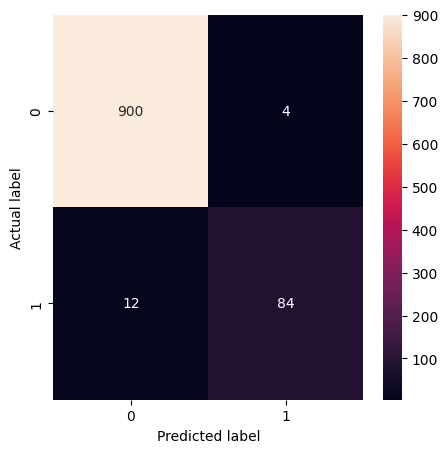

,Accuracy,Recall,Precision,F1-score
0,0.984,0.875,0.954545,0.913043


In [87]:
dec2_testdf = model_performance_classification(dec_tree2, x_test, y_test)
dec2_testdf

- Apart from the accuracy that generalizes well, the rest overfits the model

In [89]:
#Check if the model is balanced
y_train.value_counts(normalize = True)

0    0.904
1    0.096
Name: Personal_Loan, dtype: float64

- This is imbalanced

### Balance Model Again, and rebuild Decision Tree

In [88]:
smote = SMOTE(random_state=0)
X_sm, y_sm = smote.fit_resample(X,y)

In [90]:
smote = SMOTE(random_state=0)
X_sm, y_sm = smote.fit_resample(X,y)

In [91]:
from collections import Counter
Counter(y_sm)

Counter({0: 4520, 1: 4520})

- The model is balanced, let us rebuild our model

In [92]:
#Split the dataset
x_train_sm,x_test_sm, y_train_sm,y_test_sm = train_test_split(X_sm,y_sm,
                                                        test_size = 0.2,
                                                        random_state = 0)

In [94]:
#build the model
dec3_tree = DecisionTreeClassifier(random_state =0)
dec3_tree.fit(x_train_sm, y_train_sm)

DecisionTreeClassifier(random_state=0)

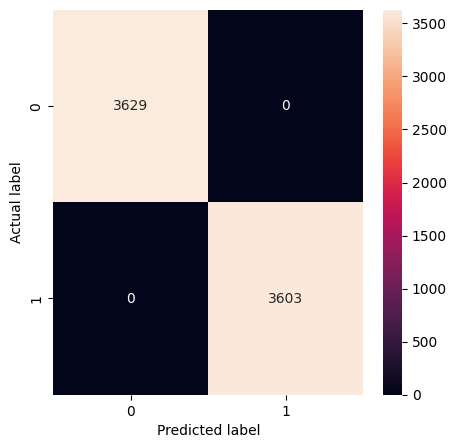

,Accuracy,Recall,Precision,F1-score
0,1.0,1.0,1.0,1.0


In [95]:
dec3_traindf = model_performance_classification(dec3_tree, x_train_sm, y_train_sm)
dec3_traindf

- Showing 100% in the training, check the testing

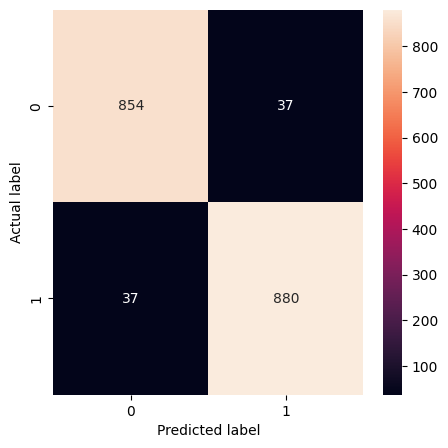

,Accuracy,Recall,Precision,F1-score
0,0.959071,0.959651,0.959651,0.959651


In [96]:
dec3_testdf = model_performance_classification(dec3_tree, x_test_sm, y_test_sm)
dec3_testdf

- This model seems to perform well in the testing too, however the model can still be  improved on

### Let's apply pre- prunning, by including max_depth

In [97]:
#build the model
dec4_tree = DecisionTreeClassifier(random_state =0, max_depth =4)
dec4_tree.fit(x_train_sm, y_train_sm)

DecisionTreeClassifier(max_depth=4, random_state=0)

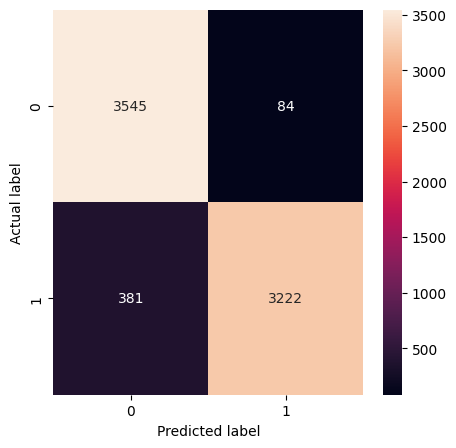

,Accuracy,Recall,Precision,F1-score
0,0.935702,0.894255,0.974592,0.932696


In [98]:
dec4_traindf = model_performance_classification(dec4_tree, x_train_sm, 
                                                y_train_sm) 
dec4_traindf 

- This perform a little bit better in the training
- let's check the testing

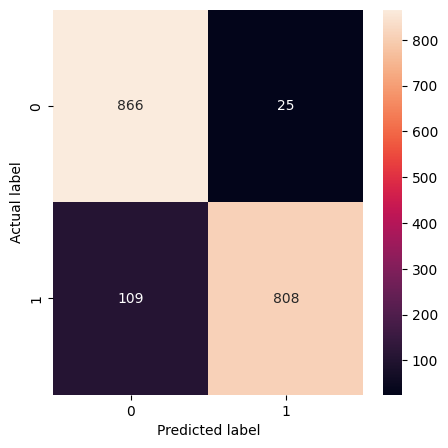

,Accuracy,Recall,Precision,F1-score
0,0.925885,0.881134,0.969988,0.923429


In [99]:
dec4_testdf = model_performance_classification(dec4_tree, x_test_sm, 
                                                y_test_sm) 
dec4_testdf 

- The model performs better in the training and generate well in the testing

- The difference between the training and testing is minimal, hence we can say that when the max depth was tuned, the model improved, although this can still be improved

In [100]:
import pydotplus
from IPython.display import Image

In [101]:
import os
os.environ["PATH"] += os.pathsep + 'C:\\Program Files\\Graphviz\\bin' 

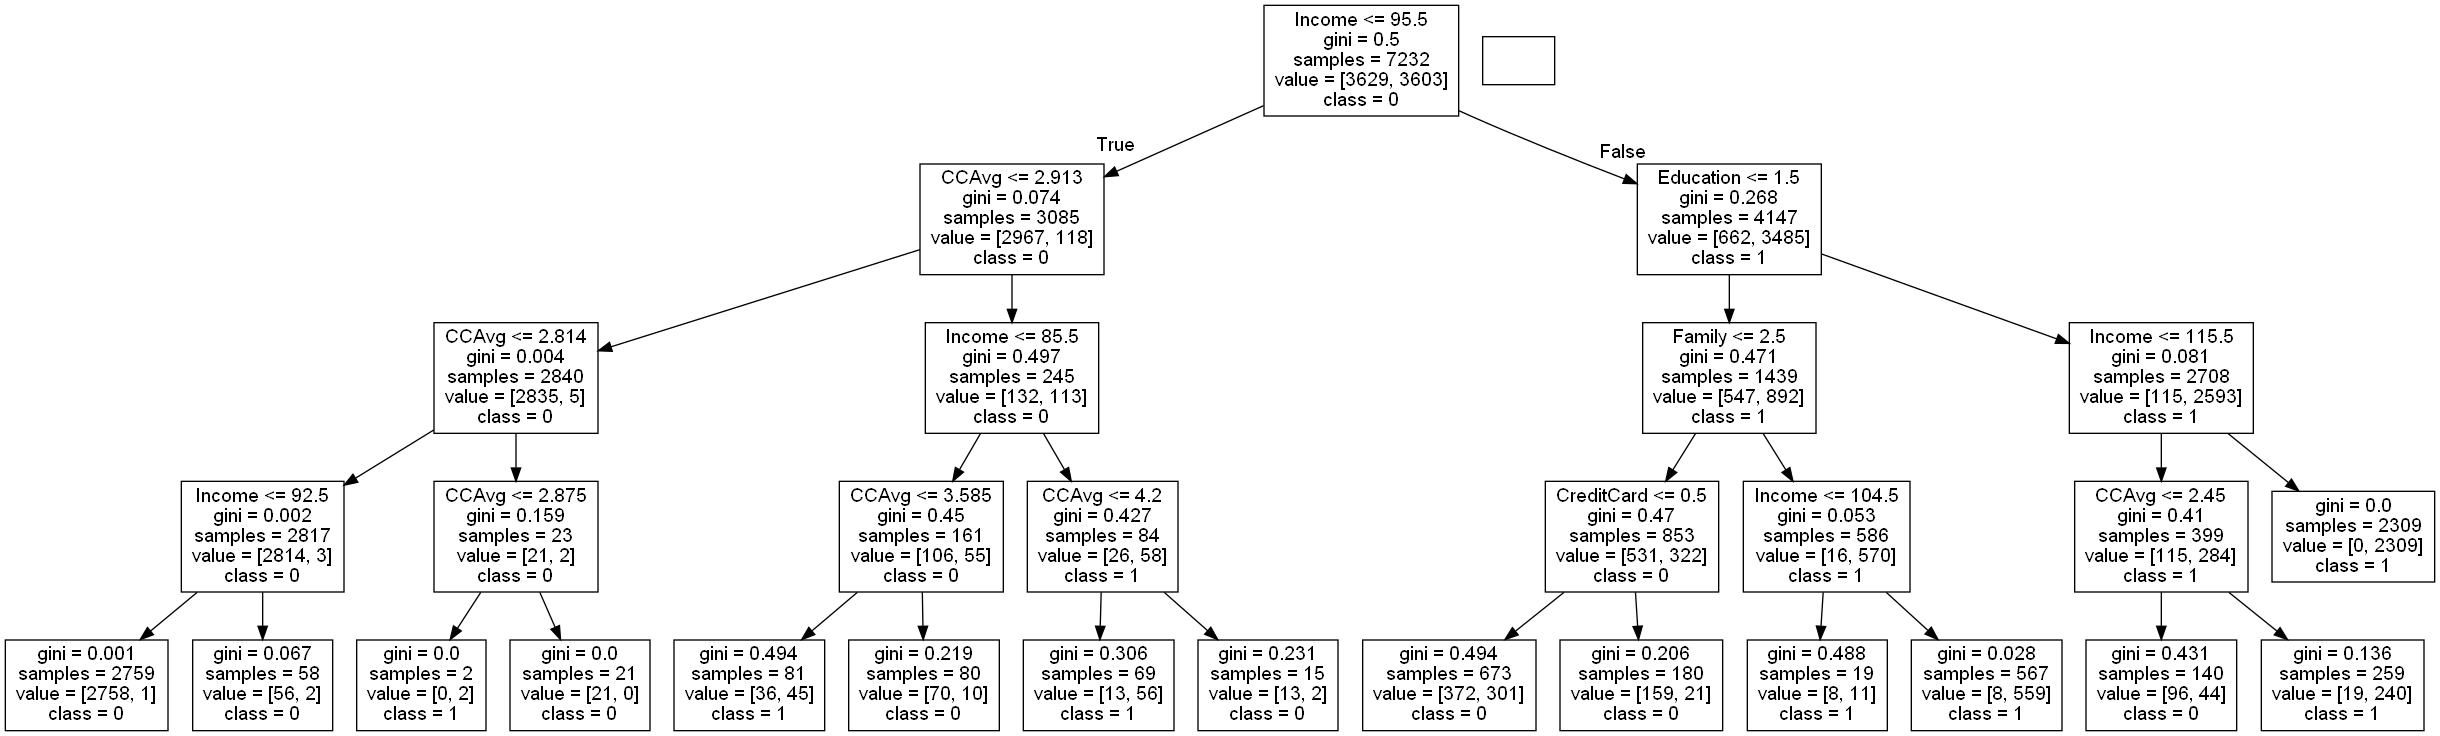

In [102]:

dot_data = tree.export_graphviz(dec4_tree, out_file = None, feature_names = X.columns,
                               class_names=["0","1"])

# create a graph from the dot data
graph = pydotplus.graph_from_dot_data(dot_data)

# create the tree image from the graph
Image(graph.create_png())

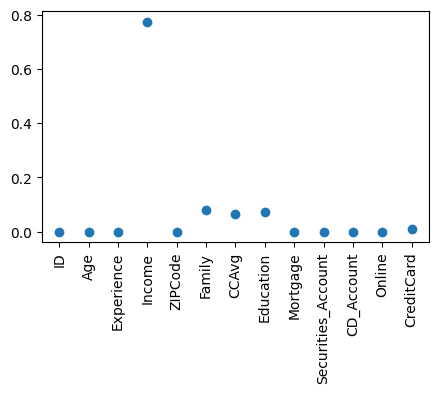

In [103]:
#Import the feature importance function
plt.figure(figsize =(5,3))
plt.plot(dec4_tree.feature_importances_, 'o')
plt.xticks(range(X.shape[1]), X.columns, rotation = 90)
plt.show()

- The income contribute highly to the features importances

- followed by family, CCAvg, and Education

### Random Forest

In [104]:
# import the random forest model
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# instanntiate the classifier
rf = RandomForestClassifier(random_state =0)# max_depth= 4 

#Split the data into training and testing
#x_train_sm, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
# train the model
rf.fit(x_train_sm, y_train_sm)

# performance scores

RandomForestClassifier(random_state=0)

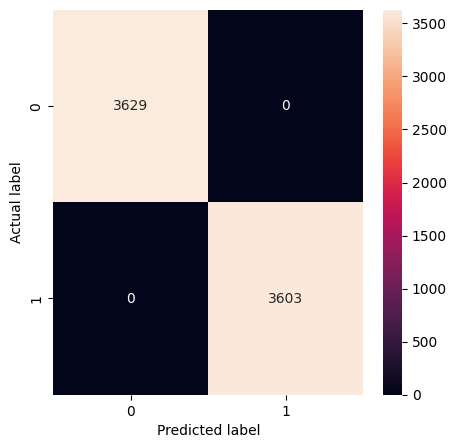

,Accuracy,Recall,Precision,F1-score
0,1.0,1.0,1.0,1.0


In [105]:
rf_train = model_performance_classification(rf,x_train_sm, y_train_sm)
rf_train

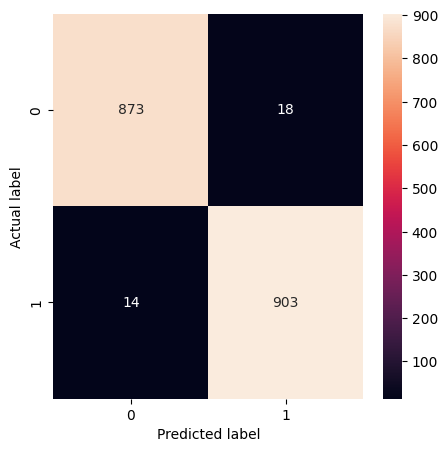

,Accuracy,Recall,Precision,F1-score
0,0.982301,0.984733,0.980456,0.98259


In [106]:
rf_test = model_performance_classification(rf,x_test_sm, y_test_sm)
rf_test

- The model performs far better than dec tree, the difference between the recall and precision is minimal

- The model overfits, but the performance is more better than the decision tree model, let  us do some tunning by including maxdepth and trying different values for maxdepth

In [108]:
# instanntiate the classifier
rf2 = RandomForestClassifier(random_state =0, max_depth = 4)# max_depth= 4 

#Split the data into training and testing
#x_train_sm, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
# train the model
rf2.fit(x_train_sm, y_train_sm)

# performance scores

RandomForestClassifier(max_depth=4, random_state=0)

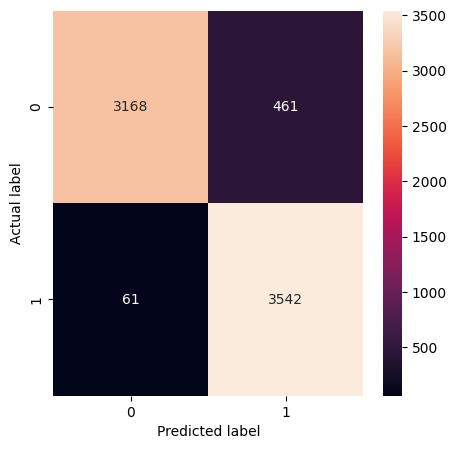

,Accuracy,Recall,Precision,F1-score
0,0.927821,0.98307,0.884836,0.93137


In [109]:
rf2_train = model_performance_classification(rf2,x_train_sm, y_train_sm)
rf2_train

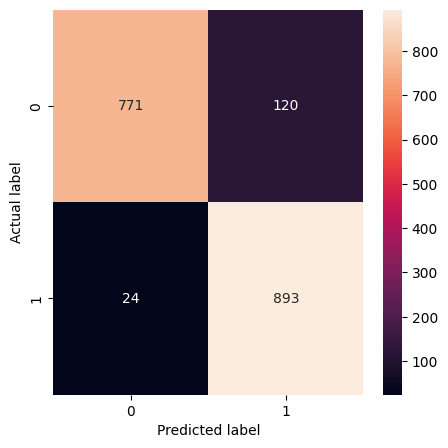

,Accuracy,Recall,Precision,F1-score
0,0.920354,0.973828,0.88154,0.925389


In [110]:
rf2_test = model_performance_classification(rf2,x_test_sm, y_test_sm)
rf2_test

- The model generalizes well by just tunning the max depth to be 4

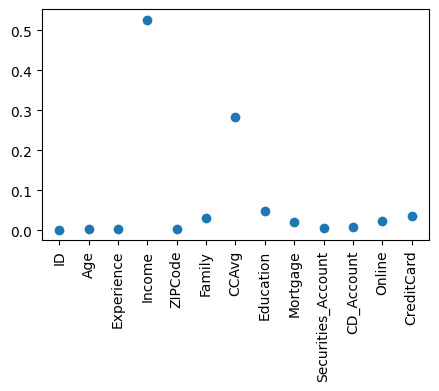

In [111]:
### Checking the feature importance
#Import the feature importance function
plt.figure(figsize =(5,3))
plt.plot(rf2.feature_importances_, 'o')
plt.xticks(range(X.shape[1]), X.columns, rotation = 90)
plt.show()

- In random forest, 2 top features contributed to the model performance which includes Income, CCAvg and the Education,Family and Credit card contributed to  make the top 5

- The set of customers that should be targeted more are customers with mortgage, online, creditcard.